**Multiple Linear Regression**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [10]:
# Assign the dataset to the variable df
df = dataset  # Assuming you intend 'df' to refer to the dataset

In [11]:
df


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

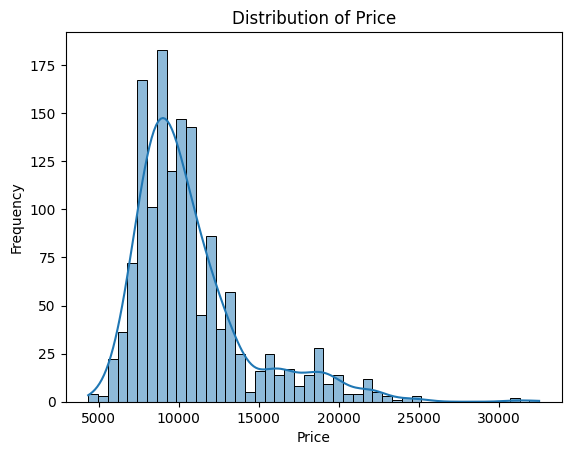

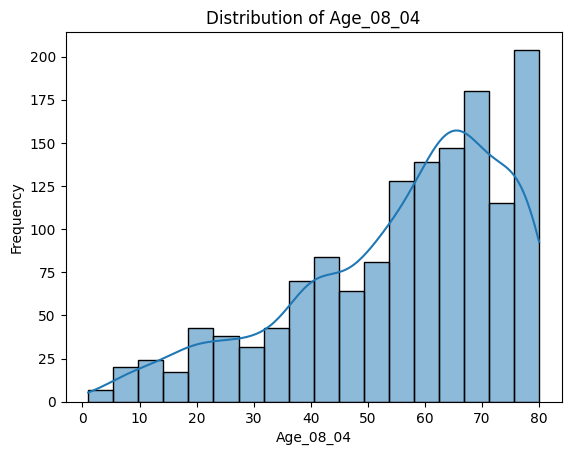

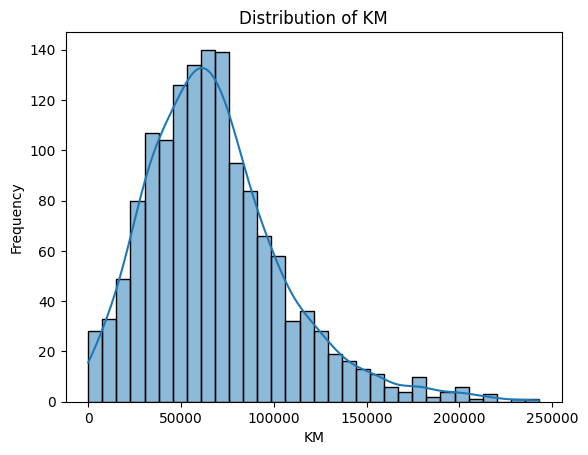

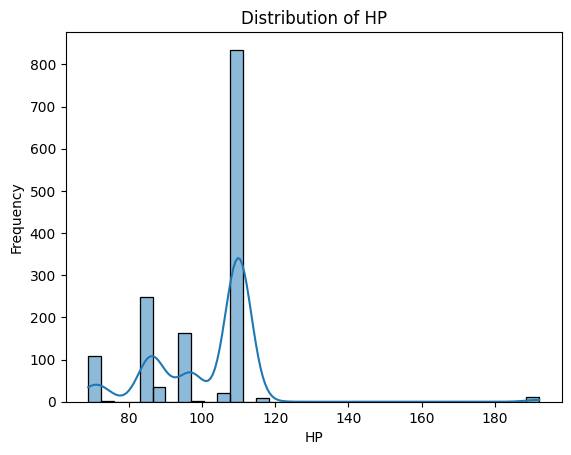

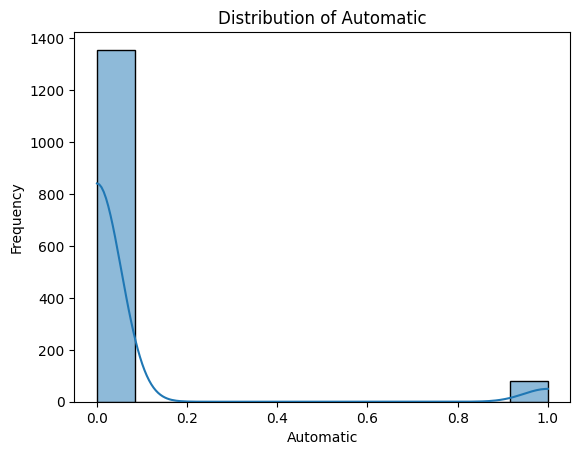

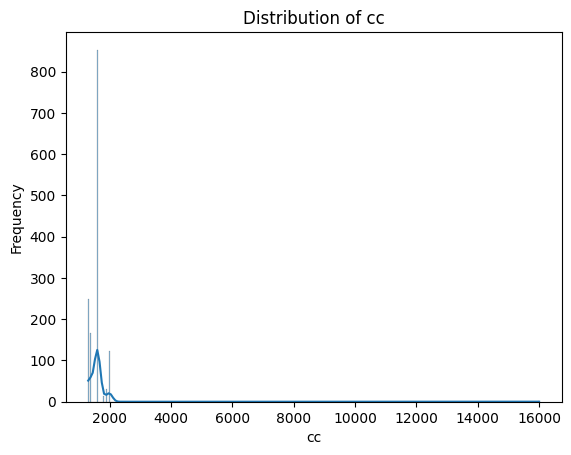

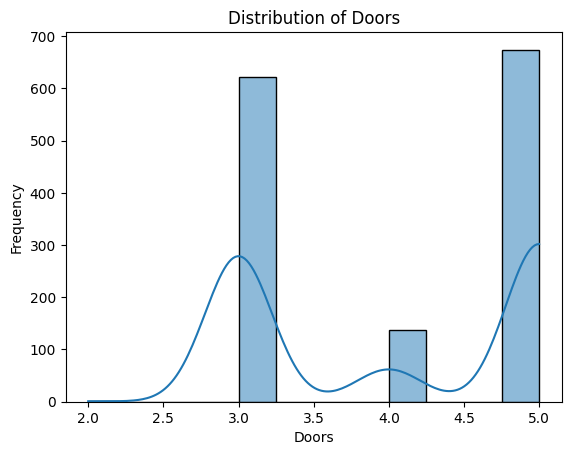

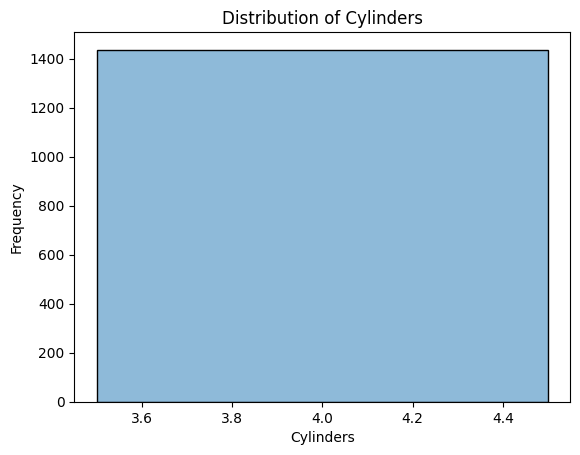

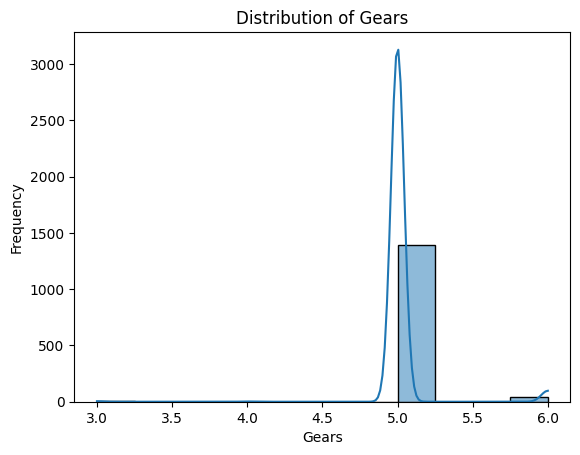

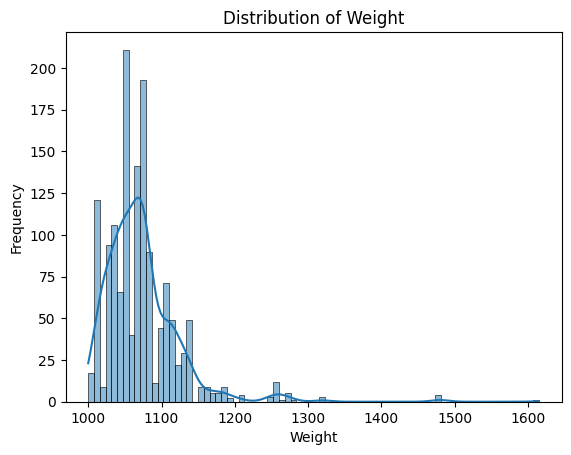

In [12]:
# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize data distribution
# Example: Histograms for numerical variables
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure()  # Create a new figure for each histogram
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


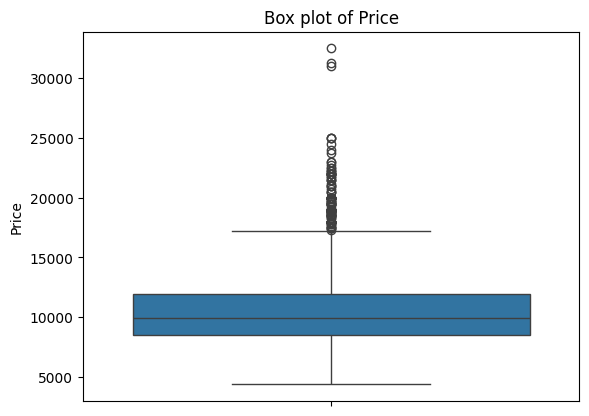

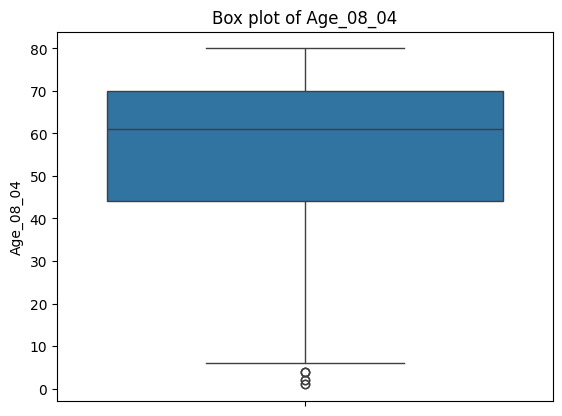

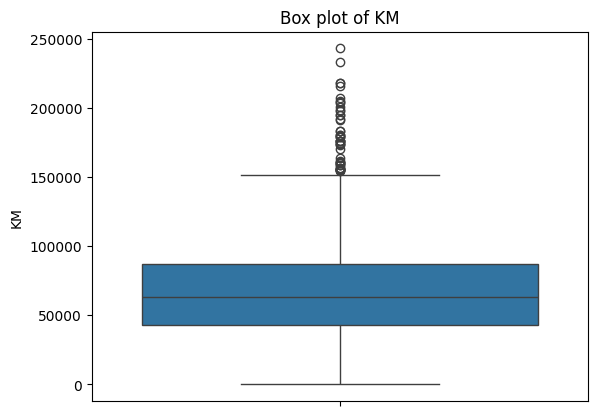

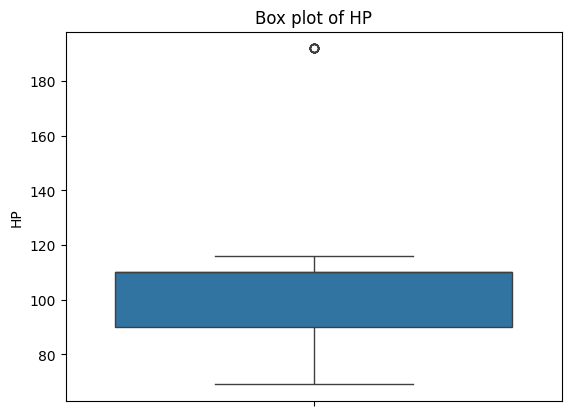

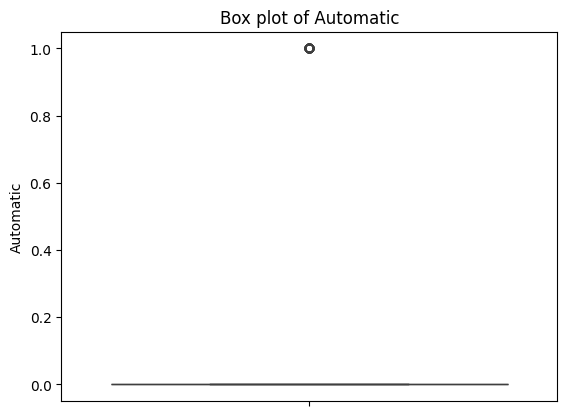

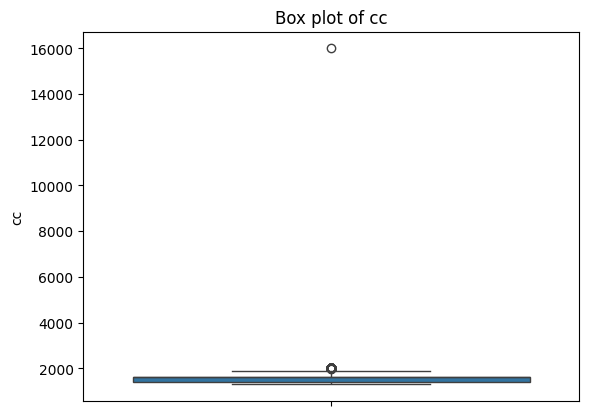

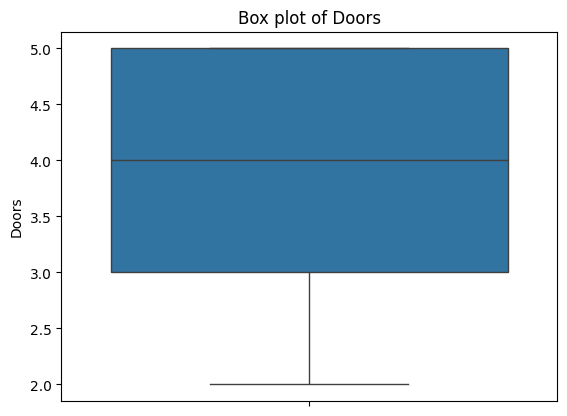

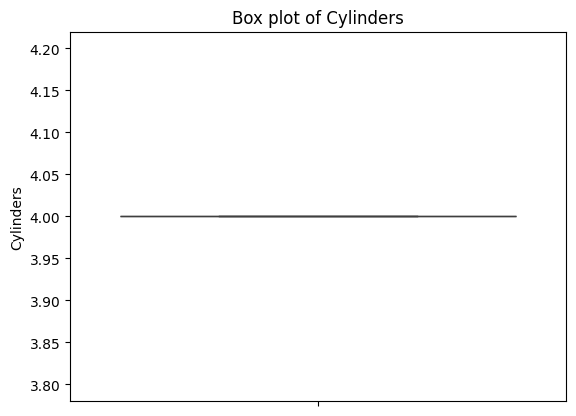

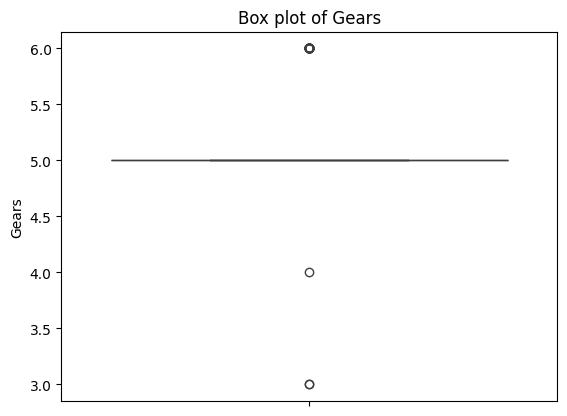

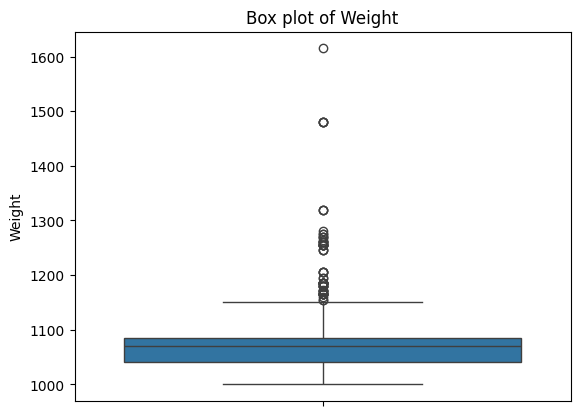

In [13]:
# Example: Box plots to identify outliers
for col in numerical_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

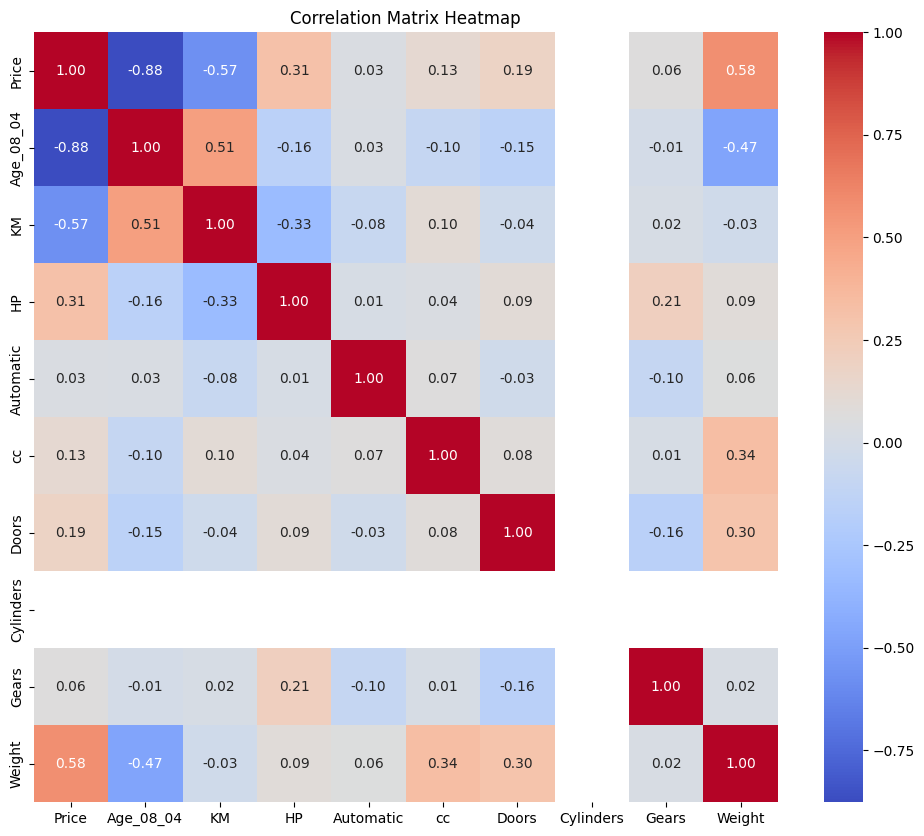

In [14]:
# Example: Correlation matrix heatmap
plt.figure(figsize=(12, 10))
# Calculate correlation only for numerical features
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
# Example: Assuming 'Price' is your target variable
X = df.drop('Price', axis=1) # Remove non-numerical
y = df['Price']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1436, 10)
y shape: (1436,)


2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [16]:
from sklearn.model_selection import train_test_split

# Assuming X and y are defined as in your previous code
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1148, 10)
X_test shape: (288, 10)
y_train shape: (1148,)
y_test shape: (288,)


3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Select numerical features for modeling (excluding 'Price')
numerical_cols = df.select_dtypes(include=np.number).drop('Price', axis=1).columns
X = df[numerical_cols]
y = df['Price']

# Split data (already done in your code)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build and evaluate a model
def build_and_evaluate_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2


In [18]:
# Model 1: All numerical features
model1, mse1, r2_1 = build_and_evaluate_model(X_train, y_train, X_test, y_test)
print("Model 1 (All Numerical Features):")
print(f"Mean Squared Error: {mse1}")
print(f"R-squared: {r2_1}")
print("Coefficients:", model1.coef_) #Coefficients

Model 1 (All Numerical Features):
Mean Squared Error: 1970126.6288130241
R-squared: 0.8523452141908858
Coefficients: [-1.20783137e+02 -1.99862732e-02  2.74291099e+01  3.71208703e+02
 -1.13513559e-01  7.53546778e+00  3.18323146e-12  6.26418444e+02
  1.98431383e+01]


In [19]:
# Model 2: Selected features (example: 'Age', 'KM', 'HP')
selected_features = ['Age_08_04', 'KM', 'HP']
X2_train = X_train[selected_features]
X2_test = X_test[selected_features]
model2, mse2, r2_2 = build_and_evaluate_model(X2_train, y_train, X2_test, y_test)

print("\nModel 2 (Selected Features):")
print(f"Mean Squared Error: {mse2}")
print(f"R-squared: {r2_2}")
print("Coefficients:", model2.coef_)



Model 2 (Selected Features):
Mean Squared Error: 2530780.7798339287
R-squared: 0.8103259513824549
Coefficients: [-1.53696216e+02 -1.13134865e-02  3.46719655e+01]


In [20]:
# Model 3: Scaled features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model3, mse3, r2_3 = build_and_evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test)
print("\nModel 3 (Scaled Features):")
print(f"Mean Squared Error: {mse3}")
print(f"R-squared: {r2_3}")
print("Coefficients:", model3.coef_)



Model 3 (Scaled Features):
Mean Squared Error: 1970126.6288130337
R-squared: 0.852345214190885
Coefficients: [-2.26640683e+03 -7.53150324e+02  4.07055792e+02  8.57920743e+01
 -5.29289891e+01  7.18023193e+00  1.01607611e-12  1.24171076e+02
  1.00945914e+03]


In [21]:
# Interpretation of Coefficients
# For example, interpret coefficients of Model 1:
print("\nInterpretation of Model 1 Coefficients:")
for i, coef in enumerate(model1.coef_):
    print(f"{numerical_cols[i]}: A one-unit increase in {numerical_cols[i]} is associated with a {coef:.2f} change in Price.")


Interpretation of Model 1 Coefficients:
Age_08_04: A one-unit increase in Age_08_04 is associated with a -120.78 change in Price.
KM: A one-unit increase in KM is associated with a -0.02 change in Price.
HP: A one-unit increase in HP is associated with a 27.43 change in Price.
Automatic: A one-unit increase in Automatic is associated with a 371.21 change in Price.
cc: A one-unit increase in cc is associated with a -0.11 change in Price.
Doors: A one-unit increase in Doors is associated with a 7.54 change in Price.
Cylinders: A one-unit increase in Cylinders is associated with a 0.00 change in Price.
Gears: A one-unit increase in Gears is associated with a 626.42 change in Price.
Weight: A one-unit increase in Weight is associated with a 19.84 change in Price.


4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [22]:
# Model Evaluation and Comparison
print("\nModel Evaluation and Comparison:")
print("---------------------------------")
print(f"Model 1 (All Numerical Features): MSE = {mse1:.2f}, R-squared = {r2_1:.2f}")
print(f"Model 2 (Selected Features): MSE = {mse2:.2f}, R-squared = {r2_2:.2f}")
print(f"Model 3 (Scaled Features): MSE = {mse3:.2f}, R-squared = {r2_3:.2f}")

# Determine the best model based on MSE and R-squared
best_model = None
best_mse = float('inf')
best_r2 = float('-inf')

if mse1 < best_mse and r2_1 > best_r2 :
    best_mse = mse1
    best_r2 = r2_1
    best_model = "Model 1"
if mse2 < best_mse and r2_2 > best_r2:
    best_mse = mse2
    best_r2 = r2_2
    best_model = "Model 2"
if mse3 < best_mse and r2_3 > best_r2:
    best_mse = mse3
    best_r2 = r2_3
    best_model = "Model 3"

print(f"\nBest Model: {best_model} (MSE = {best_mse:.2f}, R-squared = {best_r2:.2f})")


Model Evaluation and Comparison:
---------------------------------
Model 1 (All Numerical Features): MSE = 1970126.63, R-squared = 0.85
Model 2 (Selected Features): MSE = 2530780.78, R-squared = 0.81
Model 3 (Scaled Features): MSE = 1970126.63, R-squared = 0.85

Best Model: Model 1 (MSE = 1970126.63, R-squared = 0.85)


5.Apply Lasso and Ridge methods on the model.

In [23]:

from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}")
print("Coefficients:", lasso.coef_)



Lasso Regression:
Mean Squared Error: 1970085.4990309535
R-squared: 0.8523482967385115
Coefficients: [-2266.39231076  -753.09897838   407.01059842    85.67643656
   -52.77488895     7.08679546     0.           124.04962323
  1009.35304913]


In [24]:
# Ridge Regression
ridge = Ridge(alpha=0.1)  # You can adjust the alpha parameter
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")
print("Coefficients:", ridge.coef_)


Ridge Regression:
Mean Squared Error: 1970149.0255766858
R-squared: 0.8523435356239891
Coefficients: [-2266.1668518   -753.21778219   407.03196779    85.76803432
   -52.89756669     7.20563987     0.           124.1659897
  1009.46938562]


In [25]:

# Compare with previous models
print("\nModel Evaluation and Comparison (Including Lasso and Ridge):")
print("-----------------------------------------------------------")
print(f"Model 1 (All Numerical Features): MSE = {mse1:.2f}, R-squared = {r2_1:.2f}")
print(f"Model 2 (Selected Features): MSE = {mse2:.2f}, R-squared = {r2_2:.2f}")
print(f"Model 3 (Scaled Features): MSE = {mse3:.2f}, R-squared = {r2_3:.2f}")
print(f"Lasso Regression: MSE = {mse_lasso:.2f}, R-squared = {r2_lasso:.2f}")
print(f"Ridge Regression: MSE = {mse_ridge:.2f}, R-squared = {r2_ridge:.2f}")

# Determine the best model among all
models = {
    "Model 1": (mse1, r2_1),
    "Model 2": (mse2, r2_2),
    "Model 3": (mse3, r2_3),
    "Lasso": (mse_lasso, r2_lasso),
    "Ridge": (mse_ridge, r2_ridge),
}

best_model_name = ""
best_mse = float('inf')
best_r2 = float('-inf')

for name,(mse, r2) in models.items():
  if mse < best_mse and r2 > best_r2:
    best_mse = mse
    best_r2 = r2
    best_model_name = name

print(f"\nBest Model: {best_model_name} (MSE = {best_mse:.2f}, R-squared = {best_r2:.2f})")


Model Evaluation and Comparison (Including Lasso and Ridge):
-----------------------------------------------------------
Model 1 (All Numerical Features): MSE = 1970126.63, R-squared = 0.85
Model 2 (Selected Features): MSE = 2530780.78, R-squared = 0.81
Model 3 (Scaled Features): MSE = 1970126.63, R-squared = 0.85
Lasso Regression: MSE = 1970085.50, R-squared = 0.85
Ridge Regression: MSE = 1970149.03, R-squared = 0.85

Best Model: Lasso (MSE = 1970085.50, R-squared = 0.85)


Interview Questions:

1.What is Normalization & Standardization and how is it helpful?

normalization and standardization are data preprocessing techniques that adjust the range of input values
to make them easier to process and analyze: *italicized text*

**Normalization:**


Scales data to a specific range, typically between 0 and 1.
It's also known as Min-Max scaling. Normalization is useful when the data's distribution is unknown or not normally distributed.
It can help maintain data accuracy and consistency across a database.

Formula:

X_normalized = (X - X_min) / (X_max - X_min)



**Standardization:**


Transforms data to have a mean of 0 and a standard deviation of 1.
It's also known as z-score scaling. Standardization is useful when the data's distribution is known and normally distributed.
It's beneficial when the dataset follows the Gaussian distribution.

Formula:

X_standardized = (X - mean) / standard_deviation

Helpful

1.Improved Model Performance:

Many machine learning algorithms, especially distance-based algorithms like KNN, are sensitive to feature scales. Normalization and standardization ensure that all features contribute equally to the model's decision-making process.
Gradient-based optimization algorithms, like those used in neural networks, can converge faster when features are on a similar scale.  

2.Faster Convergence:

By scaling features, gradient descent algorithms can find the optimal solution more efficiently.  

3.Better Interpretability:

Scaled features make it easier to interpret the coefficients of linear models.



2.What techniques can be used to address multicollinearity in multiple linear regression?

1. VIF Check: Use Variance Inflation Factor (VIF) to identify highly correlated variables. A VIF > 10 often indicates severe multicollinearity.

2. Correlation Matrix: Examine the correlation matrix to visually identify high correlations between variables.

3. Feature Engineering: Combine correlated variables into a single feature or create interaction terms.

4. Dimensionality Reduction: Use techniques like PCA or Factor Analysis to reduce the number of variables.

5. Regularization: Employ Ridge, Lasso, or Elastic Net regression to penalize large coefficients and reduce the impact of multicollinearity.

